## NumPy arrays

NumPy has become the de facto standard package for general scientific programming in Python. Its core object is the *ndarray,* a multidimensional array of a single data type which can be sorted, reshaped, subject to mathematical operations and statistical analysis, written to and read from files, and much more. The NumPy implementations of these mathematical operations and algorithms have two main advantages over  “core” Python objects. 

First, NumPy arrays are implemented as precompiled C code and so approach the speed of execution of a program written in C itself. Unlike Python lists, *ndarrays* are homogeneous (all items have the same type) so per-item type checking that gets performed in Python is bypassed. 

Second, NumPy supports vectorization: a single operation can be carried out on an entire array, rather than requiring an explicit loop over the array’s elements.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

from IPython.display import Image, display

datadir = 'data/'
imagesdir = 'images/'

# datadir = '/content/drive/My Drive/Courses/672/Notebooks/data/'
# imagesdir = '/content/drive/My Drive/Courses/672/Notebooks/images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# using standard Python
n = 20
a = list(range(20))
c = 10
res = []
for i in range(n):
    res.append(c * a[i])
print(res)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]


In [4]:
# using NumPy
a = np.array(range(n))
res = c * a
print(res)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]


## Constructing arrays

There are many ways to create a new numpy array. These include:
+ from a Python sequence, such as a list or tuple;
+ from a numpy array-construction function; and
+ from a data file.

In [5]:
a = np.array(range(5))
b = np.array([2.2,4.2,6.6,8.0])
c = np.array([[1,2], [3,4]])

print(a)
print(b)
print(c)

[0 1 2 3 4]
[2.2 4.2 6.6 8. ]
[[1 2]
 [3 4]]


Array type is determined by content type. Note we can have multidimensional arrays. Here, *c* is a two-dimensional array.

In [6]:
a.dtype, b.dtype, c.dtype

(dtype('int64'), dtype('float64'), dtype('int64'))

In [7]:
print('a: ', a.shape)
print('b: ', b.shape)
print('c:', c.shape)

a:  (5,)
b:  (4,)
c: (2, 2)


In [8]:
print('a: ', a.ndim)
print('b: ', b.ndim)
print('c:', c.ndim)

a:  1
b:  1
c: 2


You can set the array's type explicitly too using various type codes:

In [9]:
d = np.array([2, 4], dtype='float64')
print(d.dtype)
print(d)

float64
[2. 4.]


NumPy's *arange* is analogous to Python's *range* function:

In [10]:
e = np.arange(8)
f = np.arange(0, 10, 2)   # arguments: start, stop, step
print(e)
print(f)

[0 1 2 3 4 5 6 7]
[0 2 4 6 8]


*Linspace* creates *num* evenly-spaced values between start and stop.

In [11]:
print(np.linspace(0, 100, 41))     # arguments: start, stop, number of vals

[  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100. ]


We can initialize an array with zeros or ones. These functions are called with a tuple that describes the array's shape.

In [12]:
print(np.zeros((3,3)))
print(np.ones((3,3)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


We can create arrays of zeros or ones of the same shape as a given array.

In [13]:
print(c)
print(c.shape)
print(np.zeros_like(c))
print(np.ones_like(c))

[[1 2]
 [3 4]]
(2, 2)
[[0 0]
 [0 0]]
[[1 1]
 [1 1]]


To create an array initialized with values calculated using a function, use NumPy’s ```fromfunction``` method, which takes as its arguments a function and a tuple representing the shape of the desired array. The function should  take the same number of arguments as dimensions in the array: these arguments index each element at which the function returns a value. 

In [14]:
def double(x):
    return 2 * x

def add(x, y):
    return x + y

print(np.fromfunction(double, (10,)))
print(np.fromfunction(add, (3, 3)))

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
[[0. 1. 2.]
 [1. 2. 3.]
 [2. 3. 4.]]


## Reshaping arrays

Multidimensional arrays can be flattened (in row-major order) to one dimension.

In [15]:
print(c)
print(c.flatten())

[[1 2]
 [3 4]]
[1 2 3 4]


*flatten* takes a keyword argument *order*. If set to 'C' (for C-style, the default), row-major flattening is performed; if set to 'F' (for Fortran-style), column-major is performed.

In [16]:
c.flatten(order='F')

array([1, 3, 2, 4])

More generally, we can reshape an *ndarray*. The desired shape, passed as a tuple argument, must be consistent with the shape of the input array. As usual, the array being 'reshaped' is not affected by the operation.

In [17]:
print(c)
print(c.reshape(4,))
print()
a = np.arange(24)
print(a)
print(a.reshape((6,4)))
print()
print(a.reshape((2,3,4)))

[[1 2]
 [3 4]]
[1 2 3 4]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


## Random arrays

The module *np.random* contains functions for generating arrays with random values. The arguments describe the shape of the resulting array.

In [18]:
# uniform random in [0,1] 
print(np.random.rand(8)) #  1D
print(np.random.rand(4,4))   # 2D
print()
print(np.random.randn(2, 3, 3)) # 3D

[0.67834088 0.25243751 0.98120534 0.82809136 0.13111741 0.68675361
 0.50296709 0.65328128]
[[0.90299944 0.808872   0.89768269 0.68485052]
 [0.58038706 0.22837309 0.91473707 0.25213569]
 [0.4181442  0.16614196 0.82639912 0.45620036]
 [0.46201431 0.85363032 0.93237907 0.78785287]]

[[[ 1.4196237  -0.26760586  0.37818333]
  [ 1.30650461  0.57352023  1.85785266]
  [ 0.91330187  1.01991961 -1.48685846]]

 [[ 0.09608829  0.14067608  0.323308  ]
  [ 1.88988085  0.08130921  0.70347246]
  [ 0.14524764 -0.42182239 -0.17370236]]]


In [19]:
# a 3x3 array of random ints in interval [0, 10]
np.random.randint(0, 2, (3,3))

array([[0, 1, 1],
       [1, 0, 0],
       [1, 1, 0]])

In [20]:
# a 3x3 array of normally distributed random variables
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 2.13471394e+00,  3.81080930e-01, -1.55715227e+00],
       [-1.33595633e+00, -5.52613230e-01,  6.52303269e-01],
       [-7.94732853e-01,  2.16206911e+00,  2.12810607e-04]])

## Indexing arrays

In standard Python, a list slice yields a *copy* of a slice of the original list.

In [21]:
a = list(range(10))
b = a[:3]
print(b)
b[0] = 18
print('a: ', a)  # a not affected by assignment to b
print('b: ', b)

[0, 1, 2]
a:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b:  [18, 1, 2]


But when we slice a NumPy array, we obtain a *view* of the original array rather than a copy.

In [22]:
a = np.array(range(10))
b = a[:3]
b[0] = 18
print('a: ', a)  # note a has changed by assignment to b
print('b: ', b)

a:  [18  1  2  3  4  5  6  7  8  9]
b:  [18  1  2]


We can use the *copy* function to create an independent copy.

In [23]:
a = np.array(range(10))
b = a.copy()
b[0] = 18
print('a: ', a)  # note a has changed by assignment to b
print('b: ', b)

a:  [0 1 2 3 4 5 6 7 8 9]
b:  [18  1  2  3  4  5  6  7  8  9]


In [24]:
c = np.array(range(9)).reshape((3,3))
print(c)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


We can index individual elements using two different notations.

In [25]:
c[1][1], c[1,1]

(4, 4)

We use 'comma' notation when accessing multiple elements from a multidimensional array. There is an index for each axis, where indexes are separated by commas. If you want to select every item along a particular axis, replace its index with a single colon.

In [26]:
a = {}
a[1] = c[:2, 1:]   # upper right (2,2) shape
a[2] = c[2]        # bottom row (3,)
a[3] = c[2, :]     # bottom row (3,)
a[4] = c[2:, :]    # bottom row (1, 3)
a[5] = c[:, :2]    # two left columns (3, 2)
a[6] = c[1, :2]    # elements [3,4]  (2,)
a[7] = c[1:2, :2]  # [3,4]  (1, 2)
print(c, '\n')
for i in range(1, 8):
    print(a[i])
    print('shape: ', a[i].shape, '\n')

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[1 2]
 [4 5]]
shape:  (2, 2) 

[6 7 8]
shape:  (3,) 

[6 7 8]
shape:  (3,) 

[[6 7 8]]
shape:  (1, 3) 

[[0 1]
 [3 4]
 [6 7]]
shape:  (3, 2) 

[3 4]
shape:  (2,) 

[[3 4]]
shape:  (1, 2) 



An example from one of our recommended texts:

In [27]:
a = np.linspace(1,12,12).reshape(4,3)
print(a)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


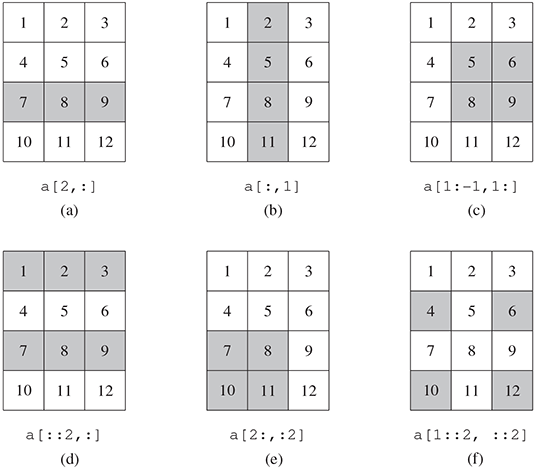

In [28]:
display_images(['numpyArraySlices.png'])

Multidimensional slices are views on the underlying array. Assigning to a slice changes the underlying array.

In [29]:
print(c, '\n')
c[:, 0] = 0 # set first column to 0
print(c, '\n')
c[1, 1] = 20 # set center element to 20
print(c, '\n')
c[2, :] = 40 # set bottom row to 40
print(c, '\n')

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[0 1 2]
 [0 4 5]
 [0 7 8]] 

[[ 0  1  2]
 [ 0 20  5]
 [ 0  7  8]] 

[[ 0  1  2]
 [ 0 20  5]
 [40 40 40]] 



### Fancy indexing
When we subscript by an array of indexes, we extract the values at those positions. This is known as *fancy indexing*.

In [30]:
a = np.random.randint(0, 10, 10)
print(a)
indx = [3, 1, 5]
print(a[indx])

[9 2 1 0 2 0 0 1 4 2]
[0 2 0]


The resulting array assumes the shape of the index array.

In [31]:
indx2 = np.array([[1, 3], [0, 4]])
print(a, '\n')
print(a[indx2])

[9 2 1 0 2 0 0 1 4 2] 

[[2 0]
 [9 2]]


We can apply fancy indexing on multidimensional arrays by providing a list of values for each dimension, using comma subscript notation.

In [32]:
a = np.random.randint(0, 10, (3,3))
print(a, '\n')
rows = [0, 1, 0]
cols = [1, 2, 2]
print(a[rows, cols])

[[1 9 3]
 [0 8 2]
 [0 2 0]] 

[9 2 3]


Here we use fancy indexing to modify values in an array.

In [33]:
a = np.random.randint(0, 10, (3,3))
print(a, '\n')
rows = [0, 1, 0]
cols = [1, 2, 2]
a[rows, cols] = 18
print(a)

[[5 1 4]
 [9 7 2]
 [9 2 2]] 

[[ 5 18 18]
 [ 9  7 18]
 [ 9  2  2]]


### Visualizing two-dimensional arrays
Two-dimensonal arrays can be visualized with the ```plt.matshow``` function. The array below is small but it illustrates the general principle. A colorbar is added as a legend. The ticks in the colorbar are specified to be 2, 4, 6, and 8. Note that the first row of the matrix (with index 0), is plotted at the top, which corresponds to the location of the first row in the matrix.

[[8 4 6 2]
 [4 8 6 2]
 [4 8 2 6]
 [8 2 4 6]]


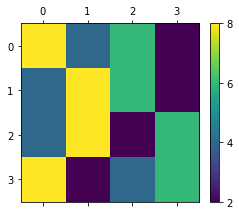

In [34]:
x = np.array([[8, 4, 6, 2],
              [4, 8, 6, 2],
              [4, 8, 2, 6],
              [8, 2, 4, 6]])
plt.matshow(x)
plt.colorbar(ticks=[2, 4, 6, 8], shrink=0.8)
print(x)


A function ```plot_function(f, nrows, ncols, cmap)``` that takes a two-argument function *f(i, j)* that returns a real number.


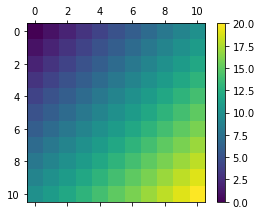

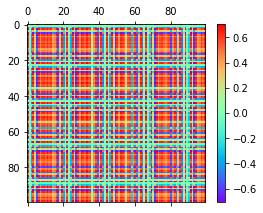

In [35]:

def plot_function(f, nrows, ncols, cmap='viridis'):
    a = np.zeros((nrows, ncols))
    for i in range(nrows):
        for j in range(ncols):
            a[i][j] = f(i, j)
    plt.matshow(a, cmap=cmap)
    plt.colorbar(shrink=0.8)
    
def f(i, j):
    return i + j

def g(i, j):
    return np.sin(np.cos(np.tan(i))) * np.sin(np.cos(np.tan(j)))

plot_function(f, 11, 11)
plot_function(g, 100, 100, cmap='rainbow')

### Conditions on arrays
We can apply Boolean operator to a numpy array to produce a Boolean numpy array of the same shape. 

In [36]:
a = np.linspace(1,12,12).reshape(4,3)
print(a)
a_lt_5 = a < 5
print(a_lt_5)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
[[ True  True  True]
 [ True False False]
 [False False False]
 [False False False]]


When the indices of an array are specified with a Boolean array, only the values of the array where the boolean array is True are selected. This lets us extract the values of an array that satisfy a certain condition. The Boolean array is used as a mask.

In [37]:
a[a > 5]

array([ 6.,  7.,  8.,  9., 10., 11., 12.])

We can use both fancy indexing and masking to compute the primes up to *n* using sieve of Eratosthenes. Here we compute a Boolean array ```is_prime``` which is True in index *i* iff *i* is prime.

In [38]:
is_prime = np.ones((100,), dtype=bool)
# 0 and 1 are not prime
is_prime[:2] = False
lim = int(np.sqrt(len(is_prime)))
# cross out multiples of i starting with 2i for each i
for i in range(2, lim):
    is_prime[2*i::i] = False
is_prime
print(np.arange(100)[is_prime])

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


A function that returns the array of all primes up to input *n*. 

In [39]:
def primes_upto(n):
    is_prime = np.ones((n+1,), dtype=bool)
    is_prime[:2] = False
    lim = int(np.sqrt(len(is_prime)))
    for i in range(2, lim):
        is_prime[2*i::i] = False
    return np.arange(n+1)[is_prime]

In [40]:
primes_upto(20)

array([ 2,  3,  5,  7, 11, 13, 17, 19])